In [304]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor


In [305]:
url = r"C:\Users\ASUS\Downloads\CAR_DETAILS.csv"
df = pd.read_csv(url)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [307]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [308]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [309]:
df.shape

(4340, 8)

In [310]:
df.dropna(inplace=True)

In [311]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [312]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [313]:
df.duplicated().sum()

763

In [314]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [315]:
data = df.copy()
data['Brand'] = data.name.str.split().str.get(0)
data['Model'] = data.name.str.split().str.get(1) + data.name.str.split().str.get(2)
data[['name','Brand','Model']]

,name,Brand,Model
0,Maruti 800 AC,Maruti,800AC
1,Maruti Wagon R LXI Minor,Maruti,WagonR
2,Hyundai Verna 1.6 SX,Hyundai,Verna1.6
3,Datsun RediGO T Option,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,Honda,AmazeVX
...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Hyundai,i20Magna
4336,Hyundai i20 Magna 1.4 CRDi,Hyundai,i20Magna
4337,Maruti 800 AC BSIII,Maruti,800AC
4338,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6


In [316]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [317]:
df.name.count()

4340

In [318]:
len(pd.unique(df['owner']))

5

In [319]:
# encoding "Fuel_Type" Column
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)


In [320]:

# encoding "Seller_Type" Column
df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)



In [321]:
# encoding "Transmission" Column
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [322]:
df.replace({'owner':{"First Owner":0, "Second Owner":1, "Third Owner":2, "Fourth & Above Owner":3, "Test Drive Car":4}},inplace=True)

In [323]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


<Axes: xlabel='owner', ylabel='count'>

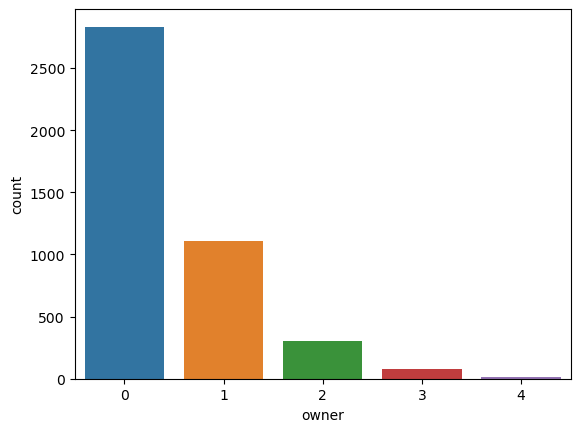

In [324]:
sns.countplot(x= 'owner', data=df)

In [325]:
df['owner'].value_counts()

owner
0    2832
1    1106
2     304
3      81
4      17
Name: count, dtype: int64

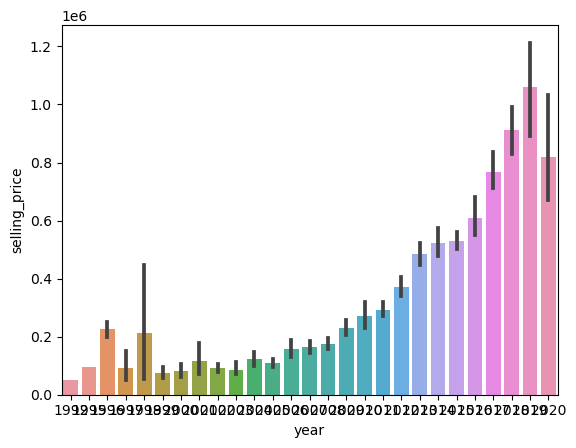

In [326]:
plot1 = sns.barplot(x='year', y ='selling_price', data=df)

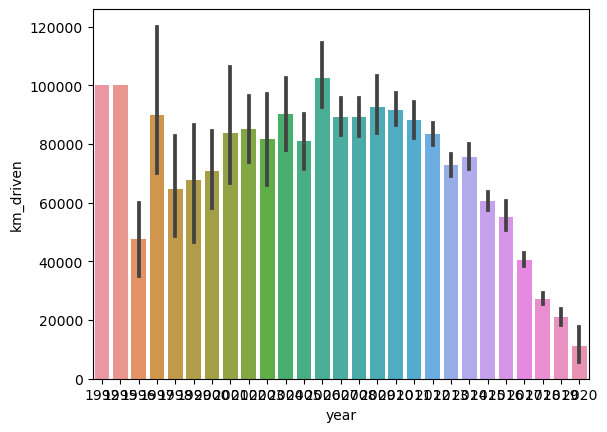

In [327]:
plot1 = sns.barplot(x='year', y ='km_driven', data=df)

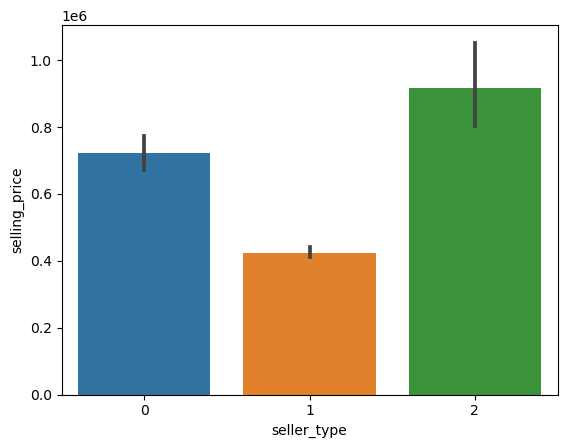

In [328]:
plot1 = sns.barplot(x='seller_type', y ='selling_price',data=df)

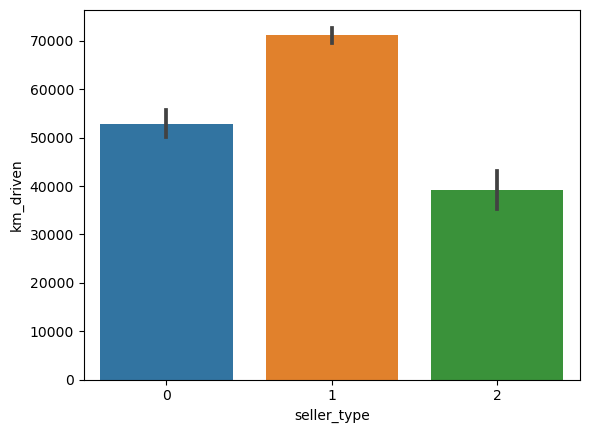

In [329]:
plot1 = sns.barplot(x='seller_type', y ='km_driven',data=df)

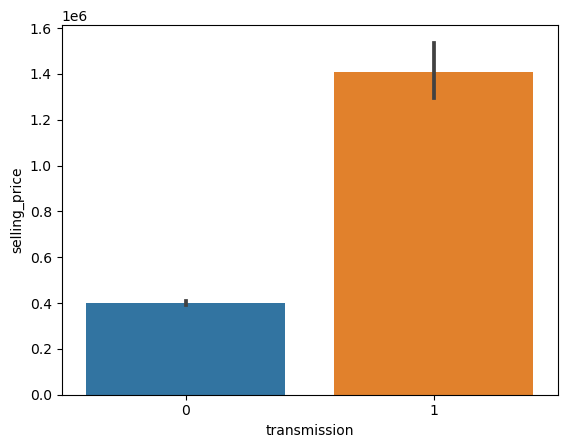

In [330]:
plot1 = sns.barplot(x='transmission', y ='selling_price',data=df)

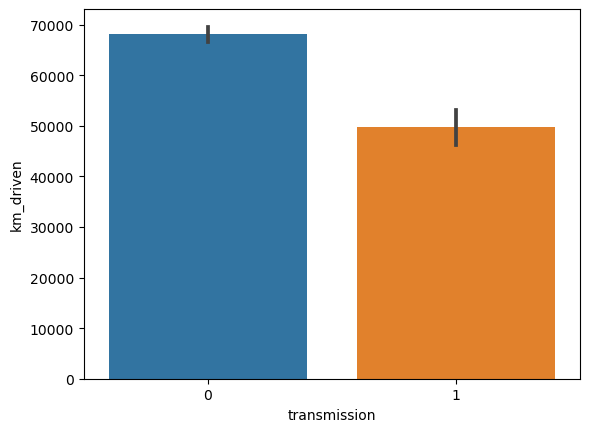

In [331]:
plot1 = sns.barplot(x='transmission', y ='km_driven' ,data=df)

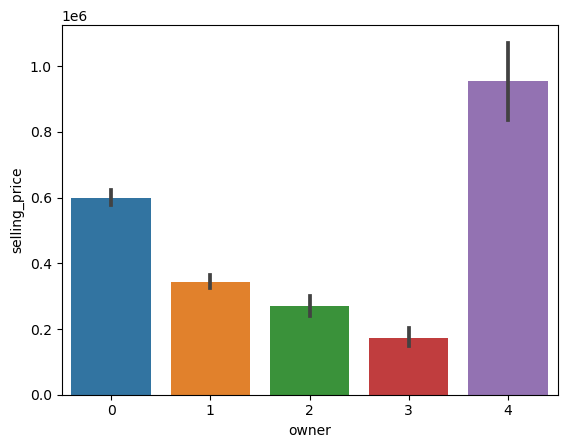

In [332]:
plot1 = sns.barplot(x='owner', y ='selling_price',data=df)

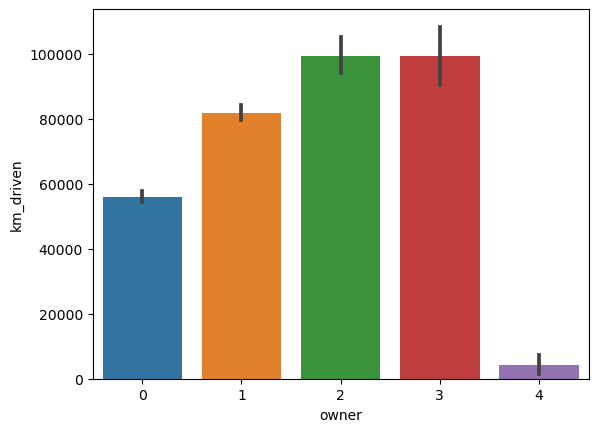

In [333]:
plot1 = sns.barplot(x='owner', y ='km_driven',data=df)

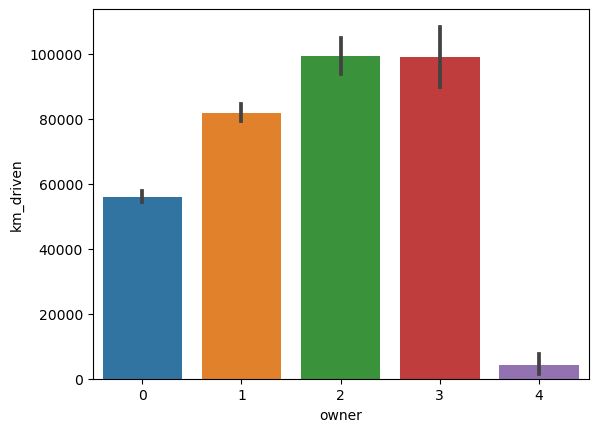

In [334]:
plot1 = sns.barplot(x='owner', y ='km_driven',data=df)

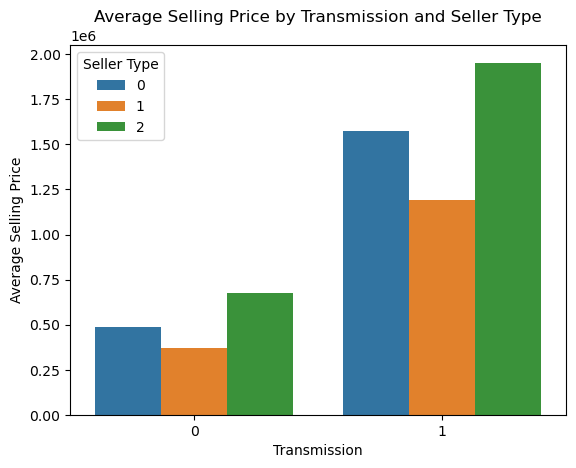

In [335]:
avg_price = df.groupby(['transmission', 'seller_type'])['selling_price'].mean().reset_index()
sns.barplot(x='transmission', y='selling_price', hue='seller_type', data=avg_price)
plt.title('Average Selling Price by Transmission and Seller Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.legend(title='Seller Type')
plt.show()

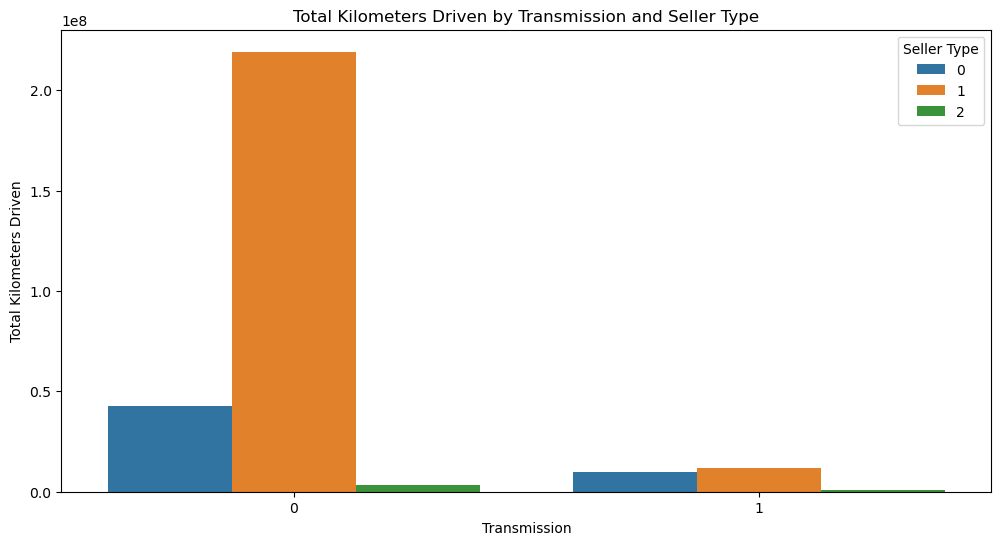

In [336]:
total_km_driven = df.groupby(['transmission', 'seller_type'])['km_driven'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='transmission', y='km_driven', hue='seller_type', data=total_km_driven)
plt.title('Total Kilometers Driven by Transmission and Seller Type')
plt.xlabel('Transmission')
plt.ylabel('Total Kilometers Driven')
plt.legend(title='Seller Type')
plt.show()

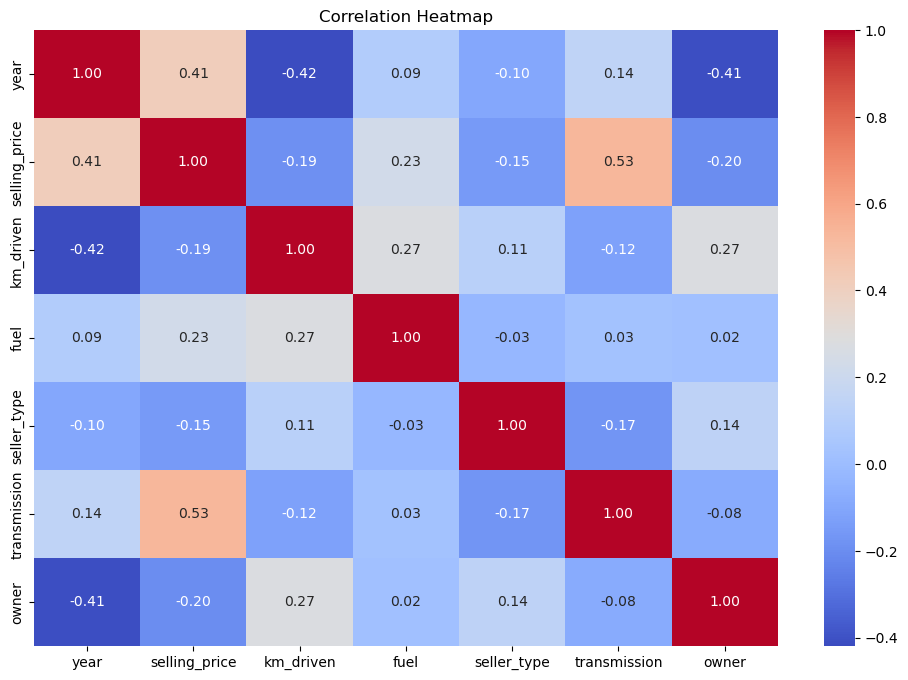

In [337]:
# Calculate the correlation matrix
new_df = df.drop(['name'],axis=1)
corr_matrix = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [338]:
X = df.drop(['name','selling_price'],axis=1)
Y = df['selling_price']

In [339]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [340]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [341]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [342]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [343]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [344]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [345]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [346]:
# R squared Error
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4276361285018683


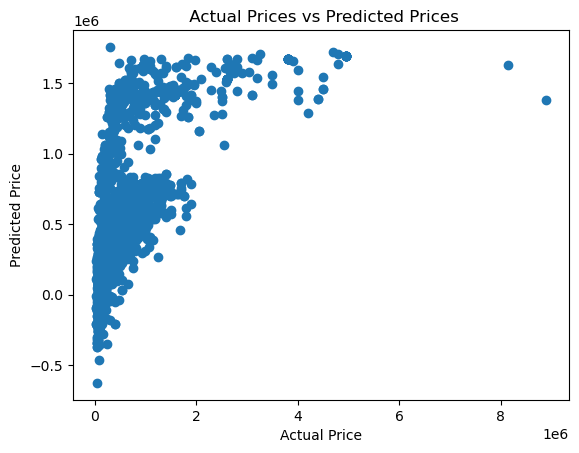

In [347]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [348]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [349]:
# R squared Error
error_score = r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.502799935375342


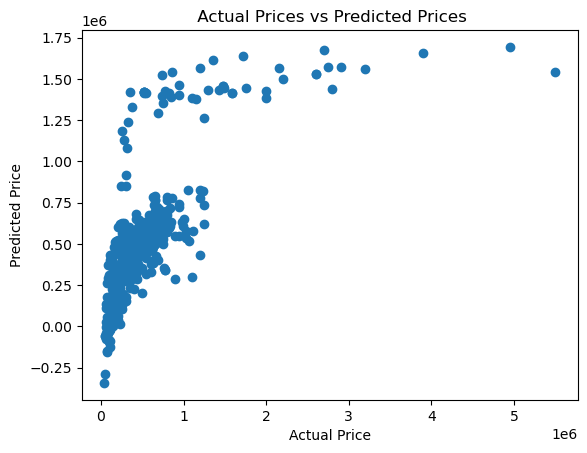

In [350]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [351]:
# loading the linear regression model
lass_reg_model = Lasso()

In [352]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [353]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [354]:
# R squared Error
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42763612844686616


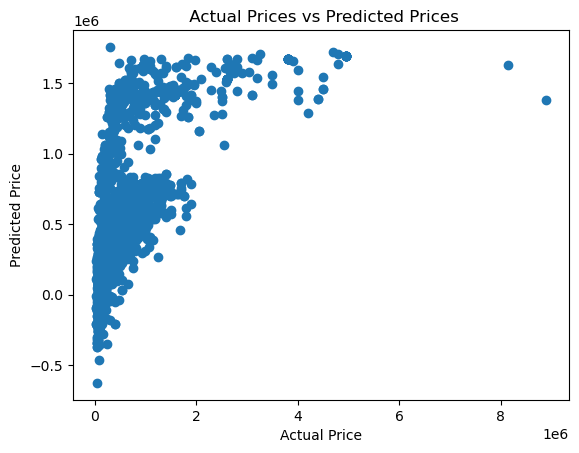

In [355]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [356]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [357]:
# R squared Error
error_score = r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5027994839428185


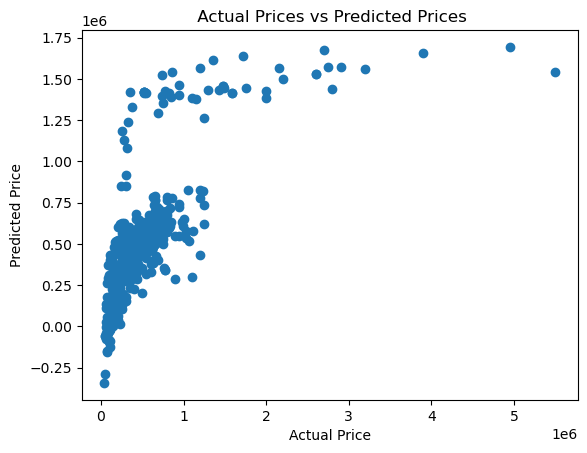

In [358]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [359]:
randomforest_model = RandomForestRegressor()

In [360]:
randomforest_model.fit(X_train,Y_train)

RandomForestRegressor()

In [361]:
# prediction on Training data
training_data_prediction = randomforest_model.predict(X_train)

In [362]:
# R squared Error
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9140640314967157


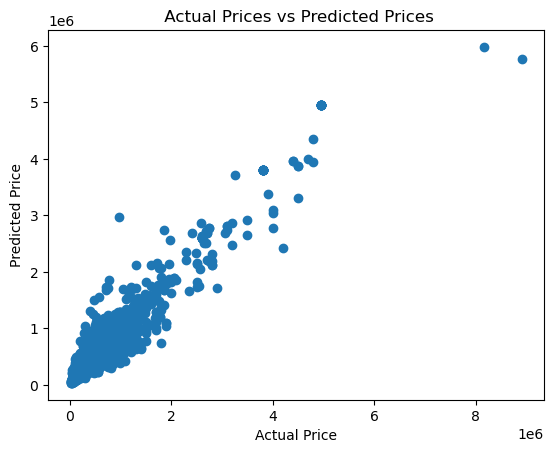

In [363]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [364]:
# prediction on Training data
test_data_prediction = randomforest_model.predict(X_test)

In [365]:
# R squared Error
error_score = r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7011913813868063


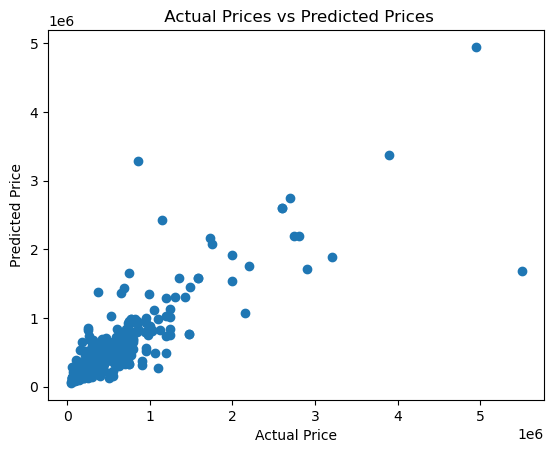

In [366]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [367]:
knn_model = KNeighborsRegressor()

In [368]:
knn_model.fit(X_train,Y_train)

KNeighborsRegressor()

In [369]:
# prediction on Training data
training_data_prediction = knn_model.predict(X_train)

In [370]:
# R squared Error
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6306171938272482


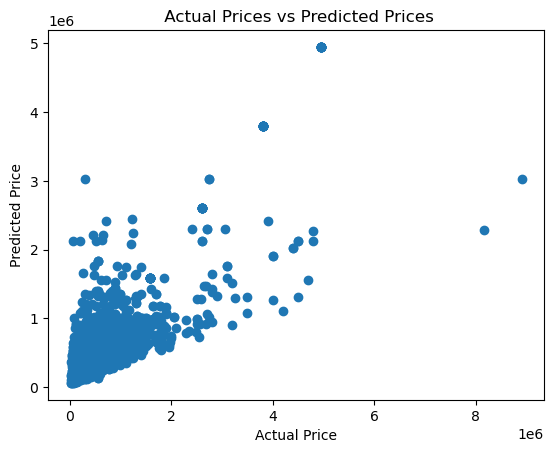

In [371]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [372]:
import pickle

filename = r"C:\Users\ASUS\Downloads\best_model.sav"
pickle.dump(randomforest_model, open(filename,'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [373]:
random_indices = np.random.choice(df.shape[0], size=20, replace=False)
random_data = df.iloc[random_indices]

X_random = random_data.drop(columns=['name','selling_price'])

random_predictions = loaded_model.predict(X_random)
random_data['predicted_target'] = random_predictions
print(random_data)

                                              name  year  selling_price  \
1423                Hyundai i10 Magna 1.2 iTech SE  2011         235000   
1300       Volkswagen Polo Diesel Comfortline 1.2L  2010         350000   
452                            Maruti Alto 800 LXI  2018         310000   
3564                          Honda Civic 1.8 V AT  2007         280000   
3855          Hyundai Santro Xing XL eRLX Euro III  2005         114999   
35                 Audi A6 2.0 TDI  Design Edition  2013        1735000   
3013              Tata New Safari DICOR 2.2 EX 4x2  2009         150000   
2732                      Maruti Wagon R VXI BS IV  2013         229999   
1866                 Mahindra Scorpio 2.6 SLX CRDe  2006         300000   
2947                     Toyota Etios Cross 1.2L G  2015         421000   
1837                     Hyundai Creta 1.6 CRDi SX  2016         535000   
2350             Mercedes-Benz B Class B180 Sports  2013        1100000   
1003                     

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26588\222162077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_data['predicted_target'] = random_predictions
